# Initial Exploratory Data Analysis of Biomarker Dataset

Note: This EDA is done prior to merging the dataset with progression.csv. As such, within this EDA, the sole focus is on understanding the datasets statistical characteristics and features utilised.

Following this analysis of all the individual datasets, there will be an EDA of all of the datasets merged, including progression.csv.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_pickle('../../data/processed/biomarkers.pkl.bz2', compression='bz2')

/var/folders/k4/6jgt4x2s2rx4xnxf88z6wtr00000gn/T/ipykernel_45097/886073841.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data.columns

Index(['S_C3M', 'S_CRPM', 'S_CTXI', 'S_HA', 'S_hsCRP', 'S_hsPRO_C2',
       'S_ARGS_LUND', 'S_NMID', 'S_COMP', 'U_CTXII_CREA', 'U_CTXIALPHA_CREA',
       'S_C2M', 'S_RE_C1M', 'S_C10C', 'S_COLL2_1', 'S_COLL2_1NO2'],
      dtype='object')

In [5]:
data.shape

(295, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 1528020110022 to 1528020110426
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S_C3M             295 non-null    float64
 1   S_CRPM            295 non-null    float64
 2   S_CTXI            295 non-null    float64
 3   S_HA              295 non-null    float64
 4   S_hsCRP           295 non-null    float64
 5   S_hsPRO_C2        295 non-null    float64
 6   S_ARGS_LUND       295 non-null    float64
 7   S_NMID            295 non-null    float64
 8   S_COMP            295 non-null    float64
 9   U_CTXII_CREA      295 non-null    float64
 10  U_CTXIALPHA_CREA  295 non-null    float64
 11  S_C2M             295 non-null    float64
 12  S_RE_C1M          295 non-null    float64
 13  S_C10C            295 non-null    float64
 14  S_COLL2_1         295 non-null    float64
 15  S_COLL2_1NO2      295 non-null    float64
dtypes: float64(16)
memory usage

In [25]:
data.describe()

,S_C3M,S_CRPM,S_CTXI,S_HA,S_hsCRP,S_hsPRO_C2,S_ARGS_LUND,S_NMID,S_COMP,U_CTXII_CREA,U_CTXIALPHA_CREA,S_C2M,S_RE_C1M,S_C10C,S_COLL2_1,S_COLL2_1NO2
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,11.993220,10.634576,0.478339,88.755932,2.551864,23.952203,0.163797,21.636169,13.664746,379.011864,0.771525,0.356949,38.783729,3752.946102,900.179661,907.528136
std,3.995953,3.668624,0.189161,84.516373,4.523881,14.748490,0.044567,7.730642,4.087068,241.964833,0.607103,0.115803,22.544701,774.936232,222.763652,712.997443
min,5.600000,3.200000,0.070000,20.000000,0.100000,11.700000,0.070000,6.440000,4.900000,40.000000,0.100000,0.130000,23.600000,1508.300000,488.000000,196.000000
25%,9.650000,8.350000,0.320000,44.450000,0.600000,19.200000,0.140000,16.355000,10.850000,220.000000,0.400000,0.290000,25.800000,3245.000000,757.500000,549.500000
50%,11.400000,10.200000,0.460000,66.500000,1.200000,21.800000,0.160000,20.720000,13.200000,320.000000,0.600000,0.340000,31.700000,3693.600000,854.000000,722.000000
75%,13.350000,12.200000,0.590000,105.200000,2.800000,24.650000,0.180000,26.510000,15.700000,480.000000,1.000000,0.390000,41.450000,4206.350000,1015.000000,985.000000
max,38.700000,34.100000,1.130000,800.000000,48.300000,219.200000,0.550000,51.790000,30.500000,2264.000000,4.800000,1.130000,194.300000,7076.100000,2122.000000,5995.000000


### Investigate Data Quality

In [8]:
# Check for missing data
data.isnull().sum()

S_C3M               0
S_CRPM              0
S_CTXI              0
S_HA                0
S_hsCRP             0
S_hsPRO_C2          0
S_ARGS_LUND         0
S_NMID              0
S_COMP              0
U_CTXII_CREA        0
U_CTXIALPHA_CREA    0
S_C2M               0
S_RE_C1M            0
S_C10C              0
S_COLL2_1           0
S_COLL2_1NO2        0
dtype: int64

In [9]:
# Check for duplicated data
data.duplicated().sum()

0

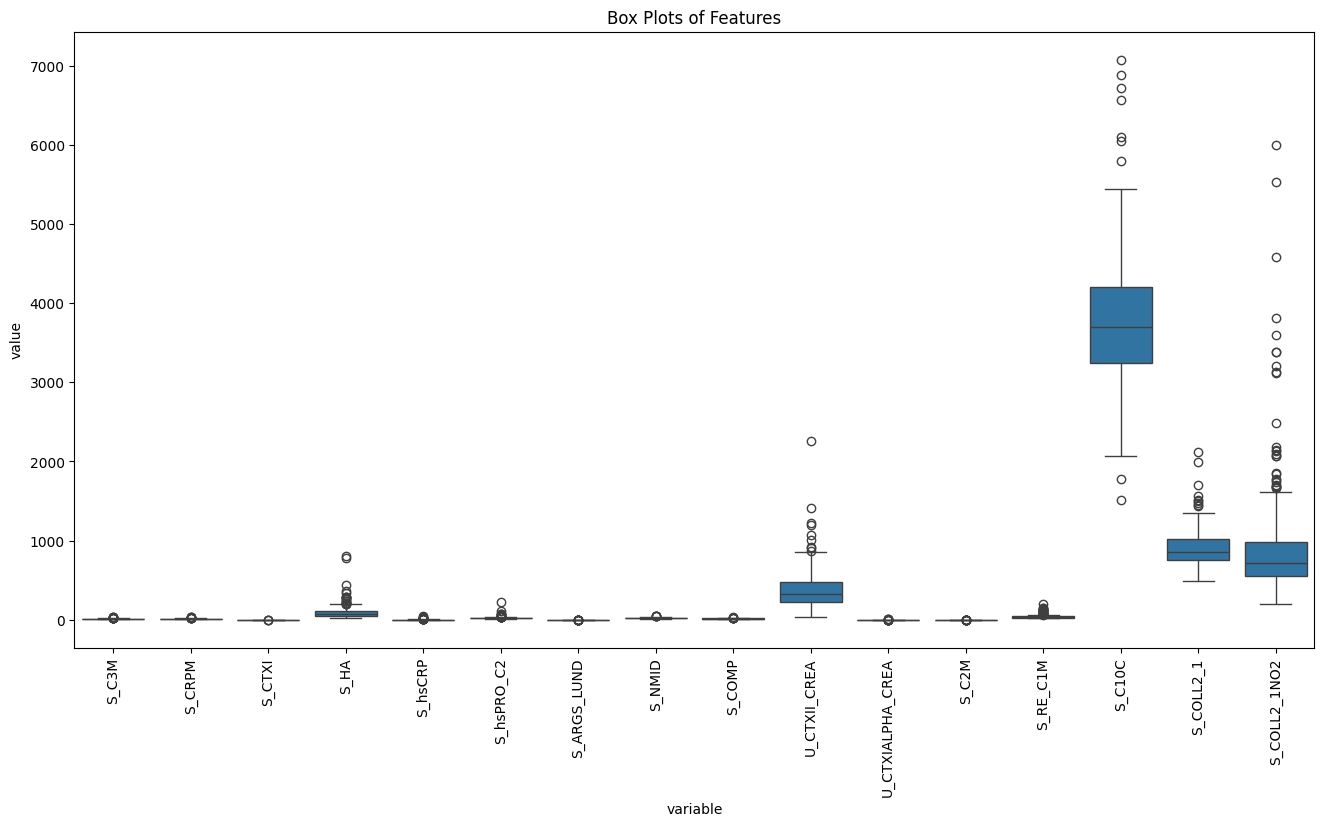

In [3]:
# Melt the dataset for visualisation purposes
data_melted = data.melt(value_vars=data.columns)

plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('Box Plots of Features')
plt.xticks(rotation=90)
plt.show()

### Univariant Analysis

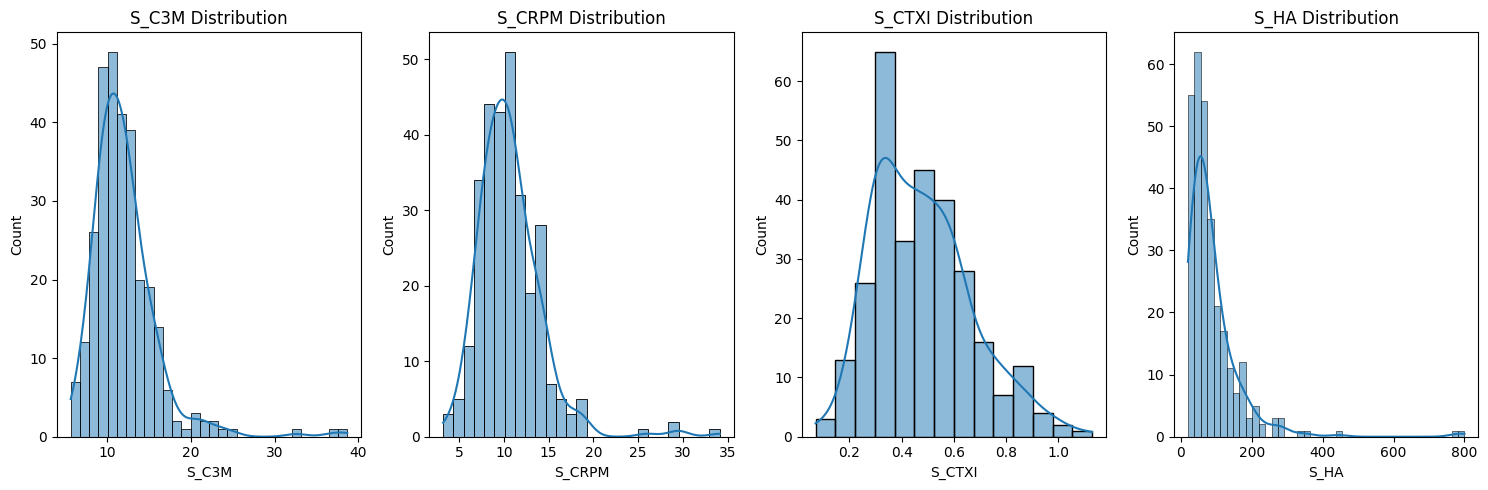

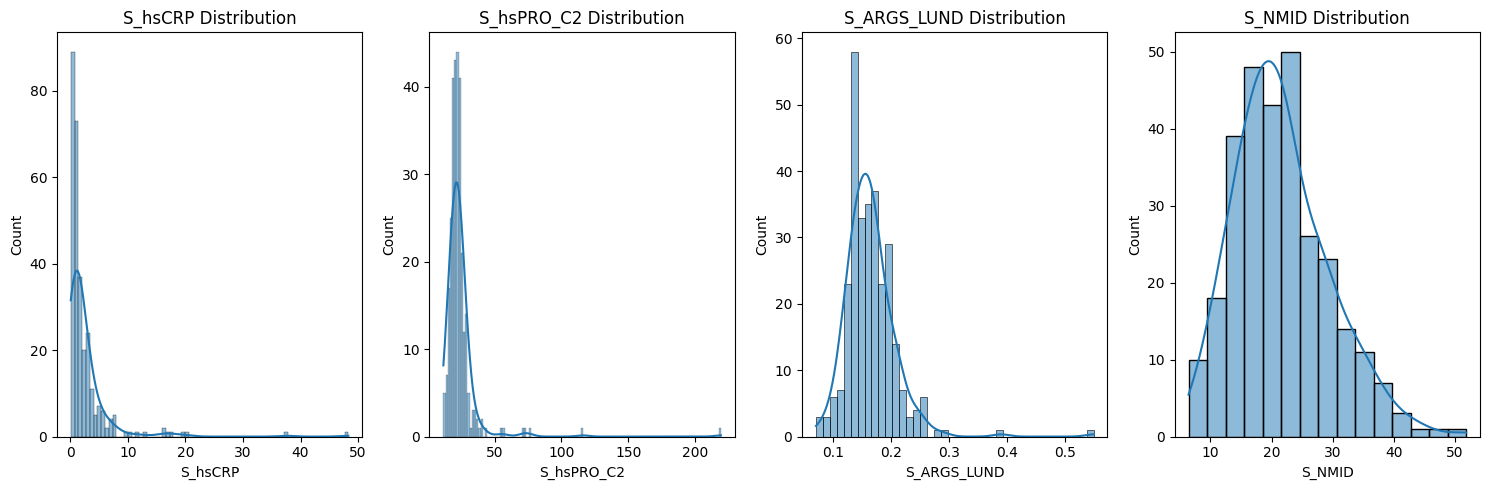

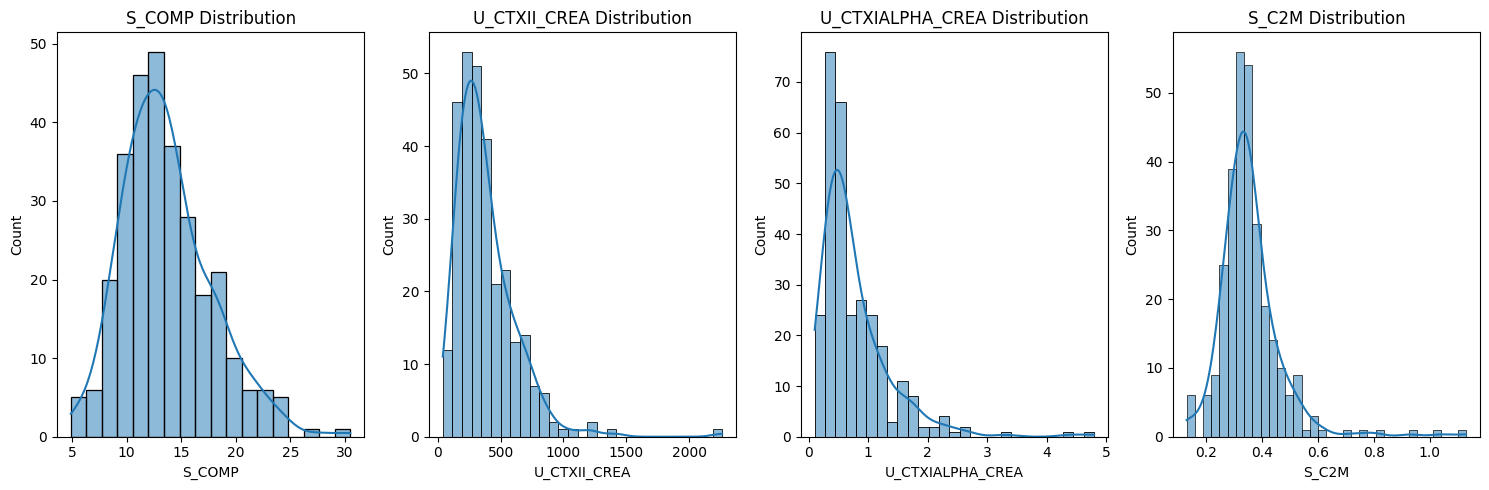

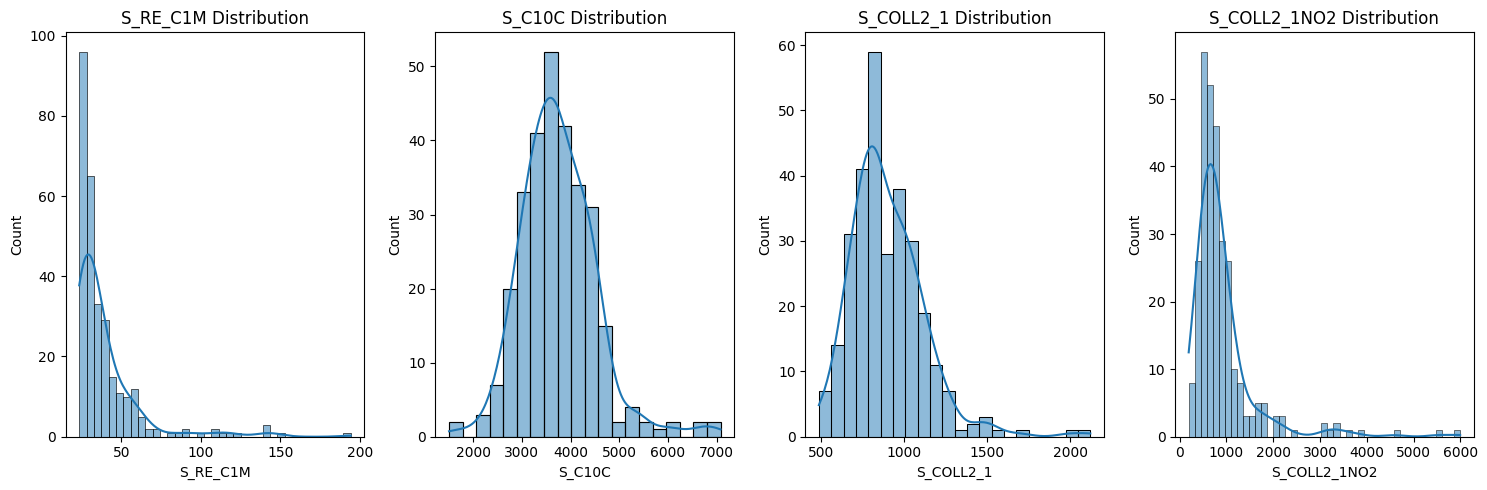

In [22]:
columns = data.columns
features_per_fig = 4

# Iterate over the columns in steps of features_per_fig
for i in range(0, len(columns), features_per_fig):
    plt.figure(figsize=(15, 5))
    
    # Loop through the next set of features_per_fig features
    for j, col in enumerate(columns[i:i+features_per_fig], start=1):
        plt.subplot(1, features_per_fig, j)
        sns.histplot(data[col], kde=True)
        plt.title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()

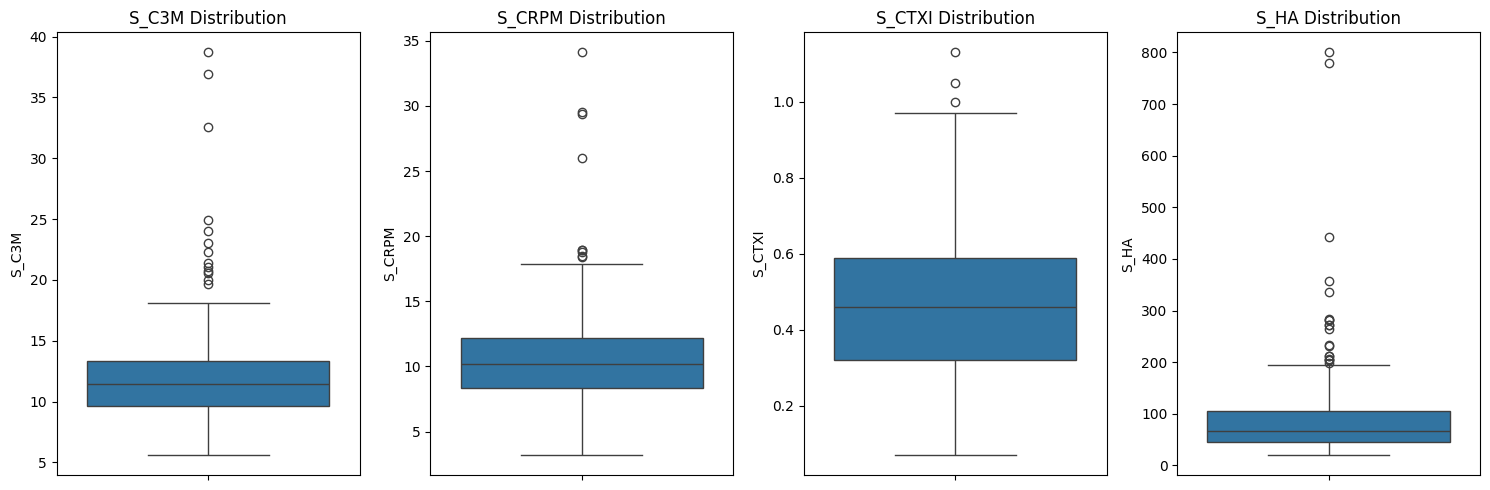

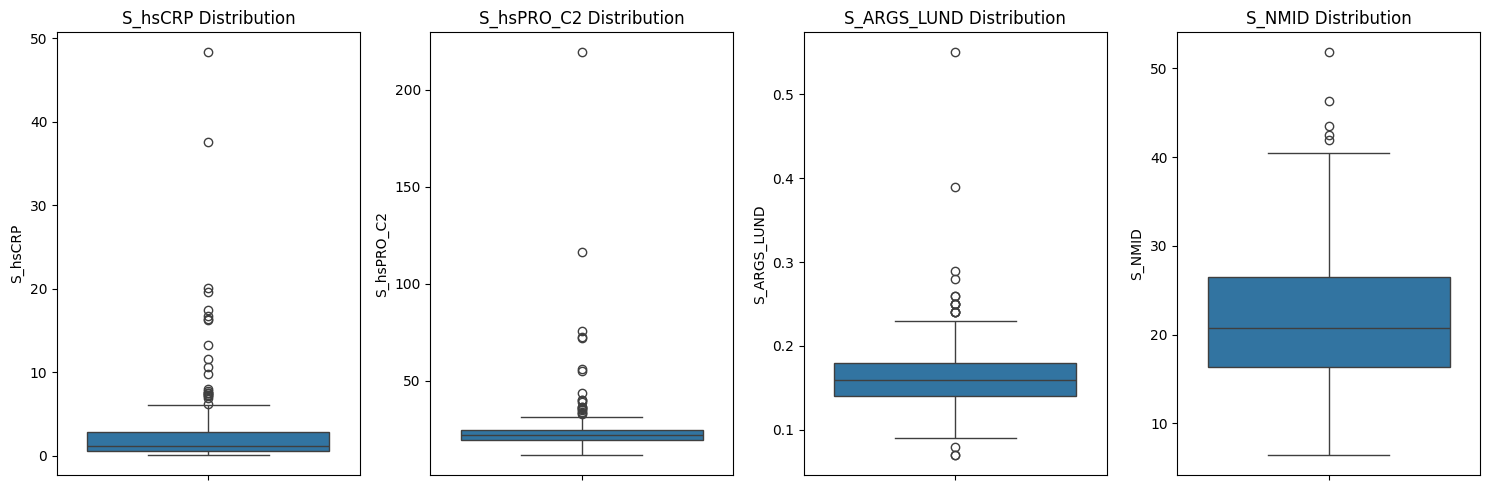

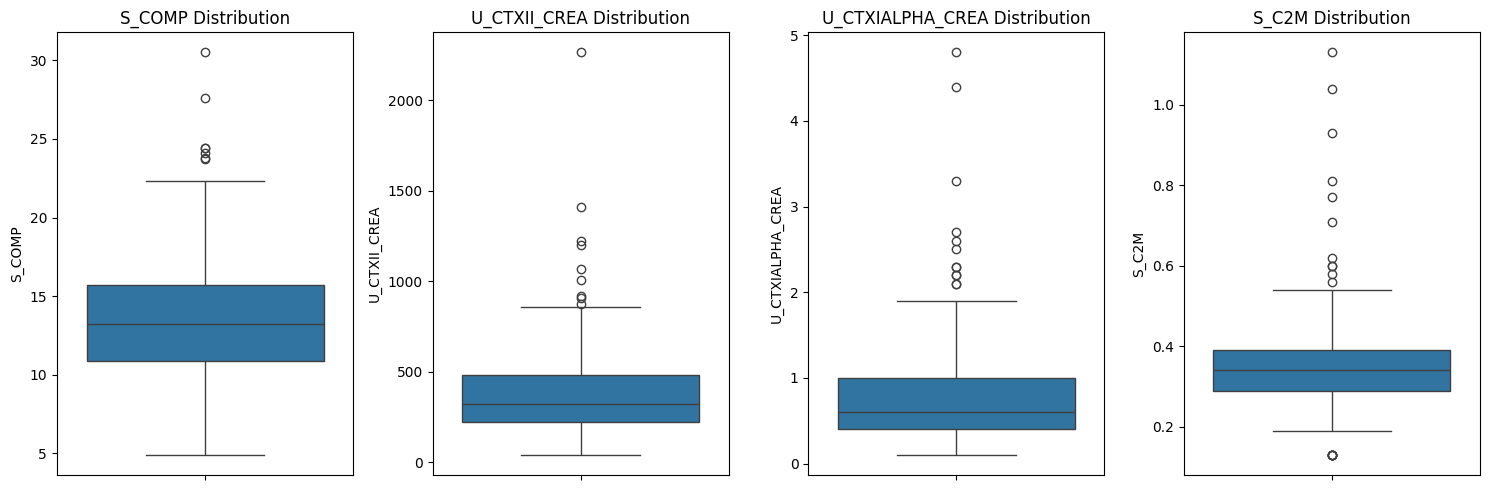

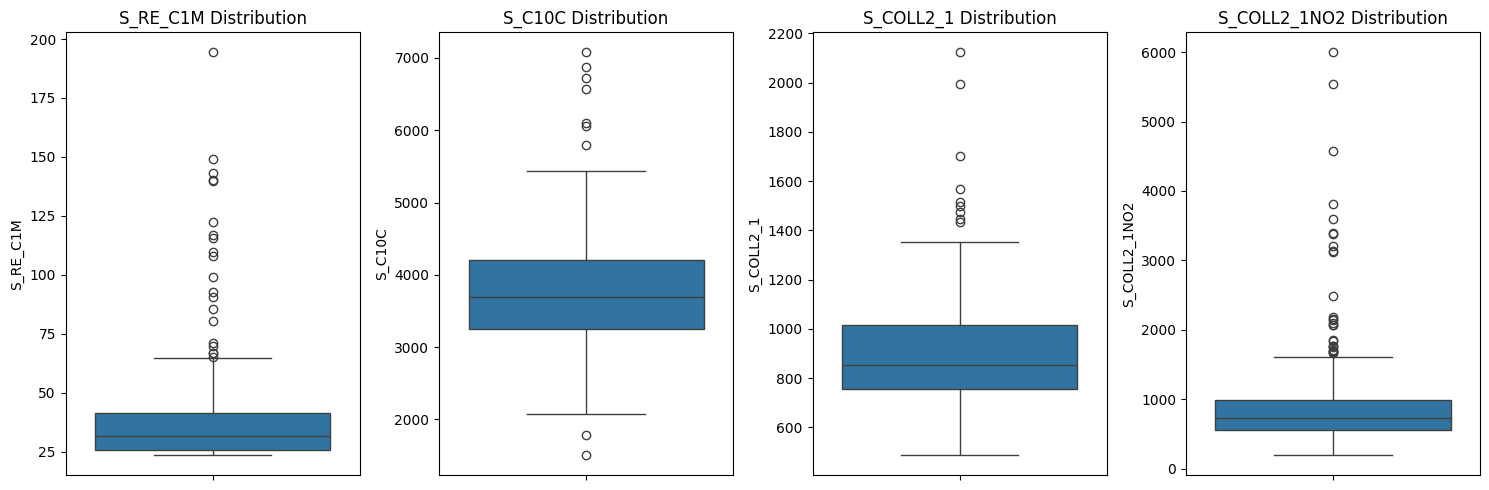

In [23]:
columns = data.columns
features_per_fig = 4

# Iterate over the columns in steps of features_per_fig
for i in range(0, len(columns), features_per_fig):
    plt.figure(figsize=(15, 5))
    
    # Loop through the next set of features_per_fig features
    for j, col in enumerate(columns[i:i+features_per_fig], start=1):
        plt.subplot(1, features_per_fig, j)
        sns.boxplot(y=data[col])
        plt.title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()

### Multivariant Analysis

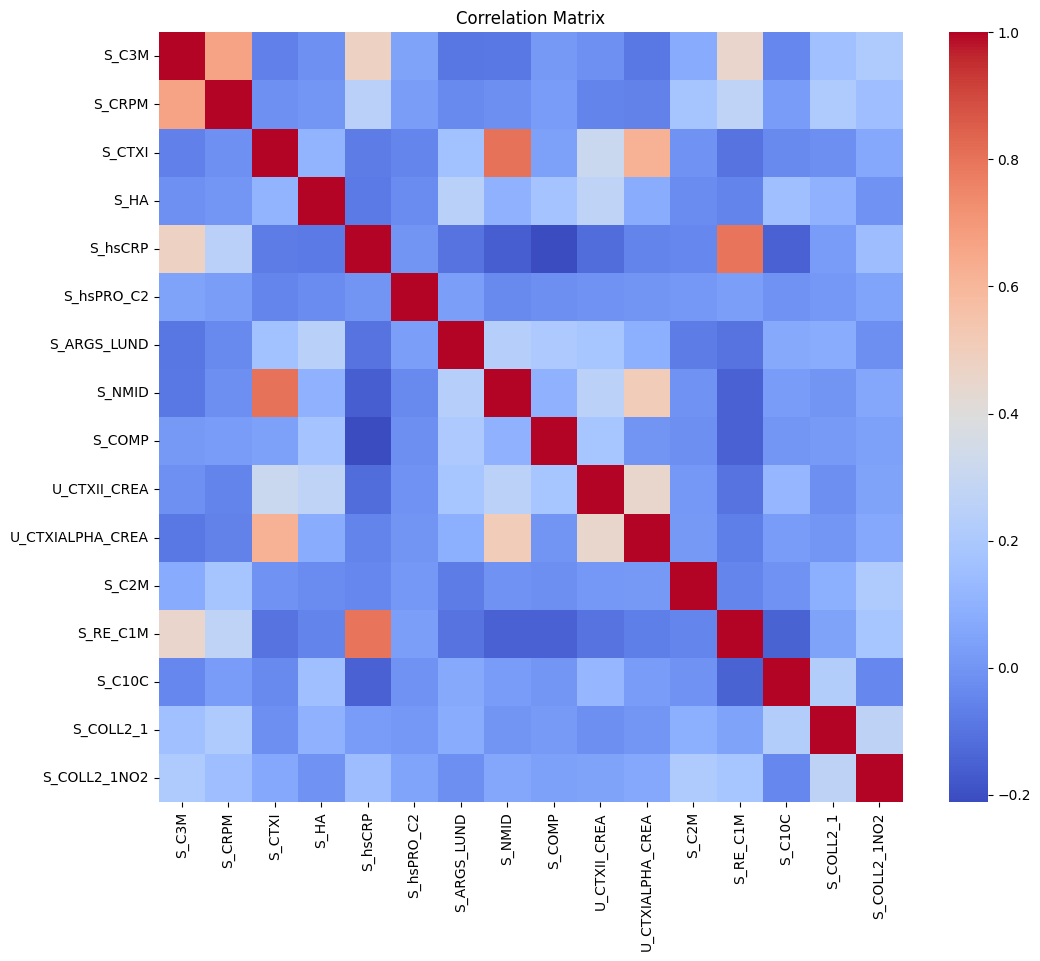

In [4]:
corr = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()